# Data Analysis and Plotting in Python

This tutorial is...
* introductory and geared towards people new to Python
* interactive with simple exercises along the way

We'll be introducing Pandas for data handling and analysis, and using Matplotlib, Seaborn and Bokeh for visualization

** Please execute sequentially **

## What is pandas?

[Pandas](https://pandas.pydata.org/pandas-docs/stable/) provides objects for working with data - `Series` and `DataFrame`

Data structures have methods for manipulating data eg. indexing, sorting, grouping, filling in missing data

Pandas does not provide modeling tools eg. regression, prediction
* These tools are found in packages such as `scikit-learn` and `statsmodels`, which are built on top of pandas

## DataFrames

A `DataFrame` combines multiple 'columns' of data into a two-dimensional object, similar to a spreadsheet

**Q1 Display the image dataframe.jpg(5 points)**

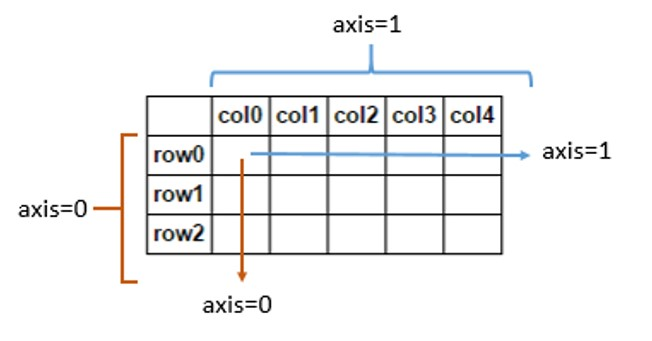

In [1]:
from IPython.display import Image

Image(filename='../Activity_2_1/dataframe.jpg')


We will create a `DataFrame` by reading in a CSV file and assigning it to the variable name `data`

### Info on the data set

* The data come from ['Assessing the Rate of Replication in Economics'](https://www.aeaweb.org/articles?id=10.1257/aer.p20171119), *American Economics Review: Papers & Proceedings*, 2017
* The dataframe `data` contains 70 empirical papers from AER's 100th volume
* `Web of Science`: number of Web of Science citations
* `Top 200`: number of Top 200 economics journal citations
* `Google Scholar`: number of Google Scholar citations
* `Replications`: number of citations that are replications of the paper
* `Extensions`: number of citations that are extensions of the paper
* `Both`: number of citations that are either replications or extensions of the paper

In [2]:
import pandas as pd  # Import the package

data = pd.read_csv('data.csv')
data.head()

,ID,Title,Web of Science,Top 200,Google Scholar,Field,Replications,Extensions,Both
0,2,Learning about a New Technology: Pineapple in ...,176,108.0,1246,Development,1.0,10.0,11.0
1,3,Multiple-Product Firms and Product Switching,111,74.0,764,Labor/IO,1.0,2.0,3.0
2,4,"Momma's Got the Pill"": How Anthony Comstock an...",23,15.0,98,Labor/IO,2.0,0.0,2.0
3,5,Matching and Sorting in Online Dating,75,23.0,326,Labor/IO,0.0,5.0,5.0
4,6,"Entry, Exit, and Investment-Specific Technical...",9,9.0,38,Macro/Int/Trade,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              70 non-null     int64  
 1   Title           70 non-null     object 
 2   Web of Science  70 non-null     int64  
 3   Top 200         70 non-null     float64
 4   Google Scholar  70 non-null     int64  
 5   Field           70 non-null     object 
 6   Replications    70 non-null     float64
 7   Extensions      70 non-null     float64
 8   Both            70 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 5.1+ KB


We can access individual columns of data, returning a `Series`

In [4]:
data['Top 200'].head()

0    108.0
1     74.0
2     15.0
3     23.0
4      9.0
Name: Top 200, dtype: float64

We can also select multiple columns, returning a new dataframe

In [5]:
data[['Title', 'Top 200']].head()

,Title,Top 200
0,Learning about a New Technology: Pineapple in ...,108.0
1,Multiple-Product Firms and Product Switching,74.0
2,"Momma's Got the Pill"": How Anthony Comstock an...",15.0
3,Matching and Sorting in Online Dating,23.0
4,"Entry, Exit, and Investment-Specific Technical...",9.0


We can add a new column to our dataframe like so

In [6]:
data['Total'] = data['Web of Science'] + data['Top 200'] + data['Google Scholar']
data.head()

,ID,Title,Web of Science,Top 200,Google Scholar,Field,Replications,Extensions,Both,Total
0,2,Learning about a New Technology: Pineapple in ...,176,108.0,1246,Development,1.0,10.0,11.0,1530.0
1,3,Multiple-Product Firms and Product Switching,111,74.0,764,Labor/IO,1.0,2.0,3.0,949.0
2,4,"Momma's Got the Pill"": How Anthony Comstock an...",23,15.0,98,Labor/IO,2.0,0.0,2.0,136.0
3,5,Matching and Sorting in Online Dating,75,23.0,326,Labor/IO,0.0,5.0,5.0,424.0
4,6,"Entry, Exit, and Investment-Specific Technical...",9,9.0,38,Macro/Int/Trade,0.0,0.0,0.0,56.0


**Q2 Calculate mean of each column in a dataset(5 points)**

In [7]:
import pandas as pd

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the mean of each numeric column
means = numeric_data.mean()

# Print the means
print(means)


ID                 52.485714
Web of Science     42.071429
Top 200            22.257143
Google Scholar    227.571429
Replications        0.742857
Extensions          1.728571
Both                2.471429
Total             291.900000
dtype: float64


`.describe()` returns useful summary statistics

In [8]:
data.describe()

,ID,Web of Science,Top 200,Google Scholar,Replications,Extensions,Both,Total
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,52.485714,42.071429,22.257143,227.571429,0.742857,1.728571,2.471429,291.900000
std,31.465068,43.070660,23.182131,257.258375,1.741944,2.868729,3.794433,319.403935
min,2.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,8.000000
25%,23.250000,17.250000,9.000000,73.250000,0.000000,0.000000,0.000000,101.000000
50%,48.500000,28.500000,15.000000,139.000000,0.000000,0.000000,1.000000,178.000000
75%,81.750000,51.000000,23.750000,267.250000,1.000000,2.750000,3.750000,330.750000
max,104.000000,195.000000,108.000000,1246.000000,9.000000,16.000000,18.000000,1530.000000


**Q3. Find the means of Top 200 and Google Scholar citations(10 points)**

**Q4. Create a table of summary statistics of Top 200 citations and Google Scholar citations(10 points)**

#### Create a table of summary statistics of the paper's fields (according to the variable `Field`)

In [9]:
data['Field'].describe()

count                  70
unique                  5
top       Macro/Int/Trade
freq                   25
Name: Field, dtype: object

## Selecting and filtering

We can use integer slicing to select rows as follows

In [10]:
data[:5]

,ID,Title,Web of Science,Top 200,Google Scholar,Field,Replications,Extensions,Both,Total
0,2,Learning about a New Technology: Pineapple in ...,176,108.0,1246,Development,1.0,10.0,11.0,1530.0
1,3,Multiple-Product Firms and Product Switching,111,74.0,764,Labor/IO,1.0,2.0,3.0,949.0
2,4,"Momma's Got the Pill"": How Anthony Comstock an...",23,15.0,98,Labor/IO,2.0,0.0,2.0,136.0
3,5,Matching and Sorting in Online Dating,75,23.0,326,Labor/IO,0.0,5.0,5.0,424.0
4,6,"Entry, Exit, and Investment-Specific Technical...",9,9.0,38,Macro/Int/Trade,0.0,0.0,0.0,56.0


We might want to find the top cited papers

First we will sort our values by a column in the dataframe

In [11]:
pd.set_option('max_colwidth', 100)  # adjust column width

data[['Title', 'Google Scholar']].sort_values(by='Google Scholar', ascending=False)[:5]

,Title,Google Scholar
0,Learning about a New Technology: Pineapple in Ghana,1246
21,The Macroeconomic Effects of Tax Changes: Estimates Based on a New Measure of Fiscal Shocks,1245
33,What Causes Industry Agglomeration? Evidence from Coagglomeration Patterns,766
1,Multiple-Product Firms and Product Switching,764
15,"Social Preferences, Beliefs, and the Dynamics of Free Riding in Public Goods Experiments",736


Another way to select rows is to use row labels, ie. set a row index

Similar to the column labels, we can add row labels (the index)

In [12]:
data.set_index('Title').head()

,ID,Web of Science,Top 200,Google Scholar,Field,Replications,Extensions,Both,Total
Title,,,,,,,,,
Learning about a New Technology: Pineapple in Ghana,2,176,108.0,1246,Development,1.0,10.0,11.0,1530.0
Multiple-Product Firms and Product Switching,3,111,74.0,764,Labor/IO,1.0,2.0,3.0,949.0
"Momma's Got the Pill"": How Anthony Comstock and Griswold v. Connecticut Shaped US Childbearing",4,23,15.0,98,Labor/IO,2.0,0.0,2.0,136.0
Matching and Sorting in Online Dating,5,75,23.0,326,Labor/IO,0.0,5.0,5.0,424.0
"Entry, Exit, and Investment-Specific Technical Change",6,9,9.0,38,Macro/Int/Trade,0.0,0.0,0.0,56.0


Note: we haven't actually changed `data`

In [13]:
data.head()

,ID,Title,Web of Science,Top 200,Google Scholar,Field,Replications,Extensions,Both,Total
0,2,Learning about a New Technology: Pineapple in Ghana,176,108.0,1246,Development,1.0,10.0,11.0,1530.0
1,3,Multiple-Product Firms and Product Switching,111,74.0,764,Labor/IO,1.0,2.0,3.0,949.0
2,4,"Momma's Got the Pill"": How Anthony Comstock and Griswold v. Connecticut Shaped US Childbearing",23,15.0,98,Labor/IO,2.0,0.0,2.0,136.0
3,5,Matching and Sorting in Online Dating,75,23.0,326,Labor/IO,0.0,5.0,5.0,424.0
4,6,"Entry, Exit, and Investment-Specific Technical Change",9,9.0,38,Macro/Int/Trade,0.0,0.0,0.0,56.0


We need to reassign the variable name `data` to the new copy

In [14]:
# data.reset_index(inplace=True)   # Uncomment this if you receive an error

data = data.set_index('Title')   # Can also use data.set_index('Title', inplace=True)
data.head()

,ID,Web of Science,Top 200,Google Scholar,Field,Replications,Extensions,Both,Total
Title,,,,,,,,,
Learning about a New Technology: Pineapple in Ghana,2,176,108.0,1246,Development,1.0,10.0,11.0,1530.0
Multiple-Product Firms and Product Switching,3,111,74.0,764,Labor/IO,1.0,2.0,3.0,949.0
"Momma's Got the Pill"": How Anthony Comstock and Griswold v. Connecticut Shaped US Childbearing",4,23,15.0,98,Labor/IO,2.0,0.0,2.0,136.0
Matching and Sorting in Online Dating,5,75,23.0,326,Labor/IO,0.0,5.0,5.0,424.0
"Entry, Exit, and Investment-Specific Technical Change",6,9,9.0,38,Macro/Int/Trade,0.0,0.0,0.0,56.0


**Q5 Give all the column values which contains "Investment and Usage of New Technologies: Evidence from a Shared ATM Network" in the 'title' field(5 points)**

In [15]:
data.loc[['Matching and Sorting in Online Dating',
          'Learning about a New Technology: Pineapple in Ghana']]

,ID,Web of Science,Top 200,Google Scholar,Field,Replications,Extensions,Both,Total
Title,,,,,,,,,
Matching and Sorting in Online Dating,5,75,23.0,326,Labor/IO,0.0,5.0,5.0,424.0
Learning about a New Technology: Pineapple in Ghana,2,176,108.0,1246,Development,1.0,10.0,11.0,1530.0


Alternatively, we can filter our dataframe (select rows) using *boolean conditions*

In [16]:
data.reset_index(inplace=True)

data['Field'] == 'Development'

0      True
1     False
2     False
3     False
4     False
      ...  
65    False
66    False
67    False
68    False
69    False
Name: Field, Length: 70, dtype: bool

Selecting rows with this boolean condition will return only rows of the dataframe where `Field == 'Development'` is `True`

In [17]:
data[data['Field'] == 'Development']

,Title,ID,Web of Science,Top 200,Google Scholar,Field,Replications,Extensions,Both,Total
0,Learning about a New Technology: Pineapple in Ghana,2,176,108.0,1246,Development,1.0,10.0,11.0,1530.0
7,Multinationals and Anti-Sweatshop Activism,9,21,8.0,134,Development,0.0,2.0,2.0,163.0
42,"Determinants of Redistributive Politics: An Empirical Analysis of Land Reforms in West Bengal, I...",64,12,9.0,63,Development,0.0,1.0,1.0,84.0
45,Watta Satta: Bride Exchange and Women's Welfare in Rural Pakistan,73,6,4.0,37,Development,0.0,0.0,0.0,47.0
55,Inherited Trust and Growth,85,102,44.0,536,Development,3.0,3.0,6.0,682.0
64,Can Higher Prices Stimulate Product Use? Evidence from a Field Experiment in Zambia,97,44,21.0,265,Development,0.0,0.0,0.0,330.0


In [18]:
data[(data['Field'] == 'Development') & (data['Web of Science'] > 100)]

,Title,ID,Web of Science,Top 200,Google Scholar,Field,Replications,Extensions,Both,Total
0,Learning about a New Technology: Pineapple in Ghana,2,176,108.0,1246,Development,1.0,10.0,11.0,1530.0
55,Inherited Trust and Growth,85,102,44.0,536,Development,3.0,3.0,6.0,682.0



**Q6. How many papers in the sample have over 100 Google Scholar citations?
 Hint: use `len()` to find the length of a dataframe ( 5 points)**

In [19]:
# Filter the DataFrame to select rows where 'Google Scholar' > 100
papers_over_100_citations = data[data['Google Scholar'] > 100]

# Get the count of papers that meet the condition
count_papers_over_100_citations = len(papers_over_100_citations)

# Print the count
print("Number of papers with over 100 Google Scholar citations:", count_papers_over_100_citations)


Number of papers with over 100 Google Scholar citations: 44


#### How many 'Labor/IO' papers have over 100 Google Scholar citations?

In [20]:
len(data[(data['Google Scholar'] > 100) & (data['Field'] == 'Labor/IO')])

10

## Grouping and aggregating data

We might want to summarize our data by grouping it by fields

To do this, we will use the `.groupby()` function

In [21]:
data.reset_index(inplace=True)

grouped = data.groupby('Field')
grouped

To return an *aggregated* dataframe, we need to specify the function we would like pandas to use to aggregate our groups

In [22]:
grouped['Both'].mean()

Field
Applied (gen.)     1.428571
Behavioral/Exp.    5.052632
Development        3.333333
Labor/IO           1.384615
Macro/Int/Trade    1.160000
Name: Both, dtype: float64

In [23]:
grouped['Both'].agg(['mean', 'median', 'count'])

,mean,median,count
Field,,,
Applied (gen.),1.428571,1.0,7
Behavioral/Exp.,5.052632,4.0,19
Development,3.333333,1.5,6
Labor/IO,1.384615,1.0,13
Macro/Int/Trade,1.160000,0.0,25


A list of built-in aggregatation functions can be found [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

## Plotting

Pandas provides a built-in plotting command to create `matplotlib` plots from your dataframes

To display our plots, we need to import first `matplotlib`

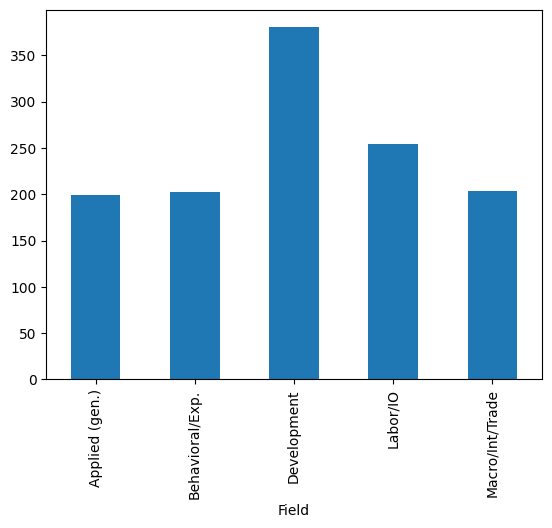

In [24]:
import matplotlib.pyplot as plt

grouped['Google Scholar'].mean().plot(kind='bar')
plt.show()

**Q7. What does alpha = 0.6 represent in the below code. Explain.(5 points)**

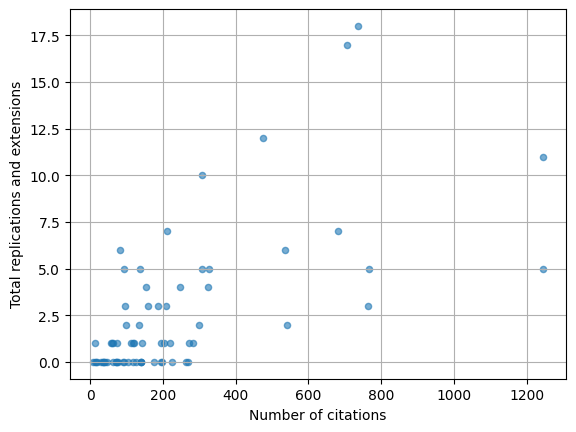

In [25]:
data.plot(x='Google Scholar', y='Both', kind='scatter', alpha=0.6)
plt.ylabel('Total replications and extensions')
plt.xlabel('Number of citations')
plt.grid()
plt.show()


**Q8. Give the bar Plot the average number of replications and extensions for each field, sorted from highest to lowest(10 points)**

## Another plotting library: `seaborn`

* `seaborn` is a plotting library built on top of `matplotlib`

* It is geared towards producing pretty plots for statistical applications

* You can find an example gallery of `seaborn` plots [here](https://seaborn.pydata.org/examples/index.html)

In [26]:
import seaborn as sns  # Import the package

**Q9. Make a joint plot for 'Google Scholar' on x - axis and 'Both' on y axis  and visualize it(10 points)**

C:\Users\singa\AppData\Local\Temp\ipykernel_3408\4079309540.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=data[data['Replications'] > 0].loc[:, 'Web of Science'], cumulative=True, bw=2)
C:\Users\singa\AppData\Local\Temp\ipykernel_3408\4079309540.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=data[data['Replications'] == 0].loc[:, 'Web of Science'], cumulative=True, linestyle='--', bw=2)


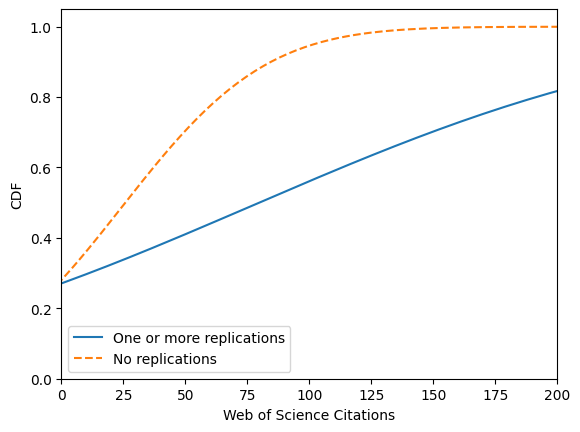

In [27]:
sns.kdeplot(data=data[data['Replications'] > 0].loc[:, 'Web of Science'], cumulative=True, bw=2)
sns.kdeplot(data=data[data['Replications'] == 0].loc[:, 'Web of Science'], cumulative=True, linestyle='--', bw=2)
plt.xlim(0, 200)
plt.xlabel('Web of Science Citations')
plt.ylabel('CDF')
plt.legend(['One or more replications', 'No replications'])
plt.show()

## Bokeh example

Bokeh is a Python library that makes creating interactive plots super easy - an example gallery is [here](http://bokeh.pydata.org/en/latest/docs/gallery.html)

In [29]:
# Import the necessary libraries
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd

# Load your DataFrame from a CSV file (replace 'data.csv' with your file's name)
df = pd.read_csv('data.csv')

# Initialize Bokeh for Jupyter Notebook
output_notebook()

# Create a ColumnDataSource from your DataFrame
source = ColumnDataSource(df)

# Create the Bokeh figure
p = figure(tools='hover', tooltips=[("Title", "@Title"), ("(Web of Science, Replications)", "(@{Web of Science}, @{Replications})"), ("(Web of Science, Extensions)", "(@{Web of Science}, @{Extensions})")])

# Plot the scatter points for 'Replications' and 'Extensions'
p.circle(x='Web of Science', y='Replications', size=7, alpha=0.5, color='red', legend_label='Replications', source=source)
p.circle(x='Web of Science', y='Extensions', size=7, alpha=0.5, color='blue', legend_label='Extensions', source=source)

# Configure the plot
p.legend.click_policy = 'hide'
p.xaxis.axis_label = 'Number of citations in Web of Science'
p.yaxis.axis_label = 'Number of replications or extensions'

# Show the plot
show(p)


Loading BokehJS ...

## Other resources

Here are some free, online resources for learning pandas/matplotlib:

* QuantEcon lectures: [Pandas](https://lectures.quantecon.org/py/pandas.html), [Pandas for Panel Data](https://lectures.quantecon.org/py/pandas_panel.html), [Matplotlib](https://lectures.quantecon.org/py/matplotlib.html)
* QuantEcon [Stata-R-Pandas cheatsheet](https://cheatsheets.quantecon.org/stats-cheatsheet.html)
* SciPy 2017: [Anatomy of Matplotlib](https://www.youtube.com/watch?v=rARMKS8jE9g)
* Coursera/University of Michigan: [Introduction to Data Science in Python](https://www.coursera.org/learn/python-data-analysis)